#Assignment-4: Binary Classification with Logistic Regression and Gradient Descent using Iris Dataset #
#Due date: Oct 26, 2022#
#Full Credit: 50 points#

##Learning Outcomes##
In this assignment students will (1) learn the implementation of Logistic Regression (not as a black box) from scratch. 

(2) Students will analyze the performance evaluation of two binary classification models with all the features of iris dataset and with two features selected from the previous assignment based on their inference from the histogram of features.

(3) Explore the best model's performance by varying the value of the learning parameter used in gradient descent.

(4) Students will learn how to split the dataset and train and test for generalization performance on two separate sets of data.

(5) Students will explore the effect of the learning rate parameter on performance.

##Instructions## 
Some helper codes are provided.

(a) Implement your own Logistic Regression with Gradient Descent. 

(b) Refer to the EDA assignment for Iris dataset. Based on the histograms of all features, you had decided which attributes could be used for modeling. Create two models (c) Using all the attributes and

(d) Using the two attributes that you inferred from the histograms based on your previous assignment. 

(e) Then compare the performance of the two models using accuracy score and confusion matrices. You must display the accuracy score and confusion matrix for both the models. 

(f) With the best model identified, analyse the effect of varying lambda on the classification performance. For each of the values of these learning rates $\lambda = 0.05, 0.5, 1, 1.5$, plot the accuracy score with respect to the learning rate. Observe the trend and report your result to the instructor.

(g) Display the confusion matrices corresponding to each of the learning rate. 

(h) State your observation on the effect of the learning rate.

(i) Suggest/ think how you can select the optimal or correct learning rate since this value influences the performance.

Report your findings and observations to your instructor.

Text(0.5, 1.0, 'logistic function')

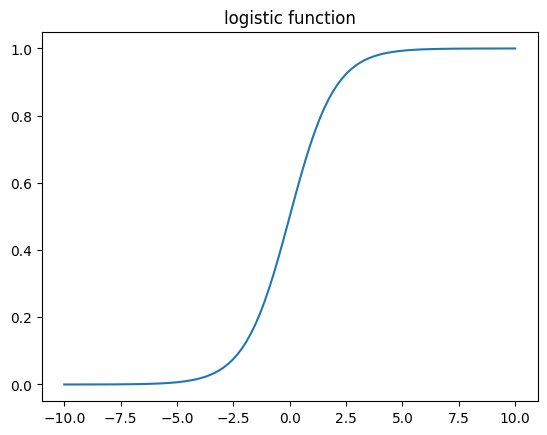

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import math

logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function
z = np.linspace(-10,10,100)
plt.plot(z, logistic(z))
plt.title('logistic function')

In [45]:
def generateVector(vector): 
    X_vector = np.c_[np.ones((len(vector), 1)), vector]
    return X_vector

def weight_init(X):
    weight = np.random.randn(len(X[0])+1, 1)
    return weight

def sigmoid_function(w_Sum):
    return 1/(1 + math.e**(-w_Sum))

def Logistic_Regression(X, y, learningRate, epochs):
    cost_lst = []
    m = len(X)
    y = np.reshape(y, (len(y), 1))   
    X_vector = generateVector(X)
    weight = weight_init(X)
    for i in range(epochs):
        gradients = 2/m * X_vector.T.dot(sigmoid_function(X_vector.dot(weight)) - y)
        weight = weight - learningRate * gradients
        y_pred = sigmoid_function(X_vector.dot(weight))
        cost_value = - np.sum(np.dot(y.T,np.log(y_pred) + np.dot((1-y).T, np.log(1-y_pred)))) / (len(y_pred))
        cost_lst.append(cost_value)
        print("Epoch: {e} -> Loss: {l}".format(e=i, l=cost_value))
    return weight         

In [46]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import csv
from sklearn import datasets
dataset = datasets.load_iris()

X, y = dataset['data'][:,:2], dataset['target']
X, y = X[y < 2], y[y< 2]                                # we only take the data of class 0 and 1

** Here we split the dataset into Train and Test**

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    stratify=y,
                                                    random_state=123)

In [48]:
def y_class(y_hat):
    return [1 if i > 0.5 else 0 for i in y_hat]

def accuracy(true_values, predictions):
    return np.mean(true_values == predictions)


**Task: Use the train dataset X_train and y_train to train your model. Then use the other test set X_test and y_test to predict your model performance. You will report all results based on the test dataset.**

In [53]:
weight = Logistic_Regression(X_train,y_train, 0.5, 20)
print("Weights: ", weight)

x_testVector = generateVector(X_test)
y_hat = sigmoid_function(x_testVector.dot(weight))
y_hat_class = y_class(y_hat)


Epoch: 0 -> Loss: 267.141918205949
Epoch: 1 -> Loss: 2.1543333997786616
Epoch: 2 -> Loss: 281.2889205488975
Epoch: 3 -> Loss: 1.7895828348561096
Epoch: 4 -> Loss: 268.58270736335123
Epoch: 5 -> Loss: 1.6868519502300547
Epoch: 6 -> Loss: 264.72123442068244
Epoch: 7 -> Loss: 1.5356464365312004
Epoch: 8 -> Loss: 252.98054420829726
Epoch: 9 -> Loss: 1.5319951961234055
Epoch: 10 -> Loss: 246.6269277989694
Epoch: 11 -> Loss: 1.4547817281369448
Epoch: 12 -> Loss: 235.61547997605453
Epoch: 13 -> Loss: 1.4883552790133834
Epoch: 14 -> Loss: 227.66086011741237
Epoch: 15 -> Loss: 1.4665013307593622
Epoch: 16 -> Loss: 217.27660417208497
Epoch: 17 -> Loss: 1.5085587387000785
Epoch: 18 -> Loss: 208.2987995202393
Epoch: 19 -> Loss: 1.5227656573749175
Weights:  [[ 0.54751753]
 [ 1.82003639]
 [-5.08105825]]


Accuracy is 1.0


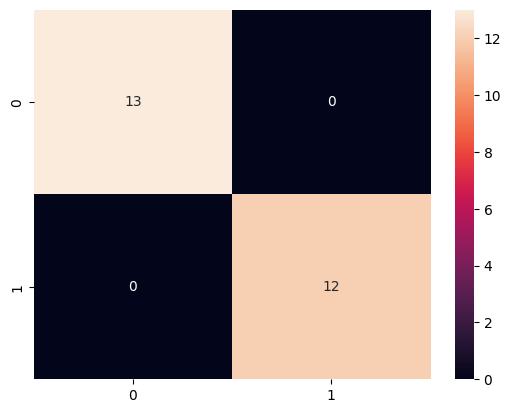

In [50]:
# Build the conufsion matrix and get the accuracy/score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_hat_class)
sns.heatmap(cm, annot=True)
print("Accuracy is {a}".format(a=accuracy(y_test, y_hat_class)))

In [54]:
# Create a model with all the 4 features
X_new, y_new = dataset['data'], dataset['target']
X_new, y_new = X_new[y_new < 2], y_new[y_new < 2]


X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size = 0.25,
                                                    stratify = y_new,
                                                    random_state = 123)

new_weight = Logistic_Regression(X_new_train, y_new_train, 0.5, 20)
X_new_test_vector = generateVector(X_new_test)
y_new_hat = sigmoid_function(X_new_test_vector.dot(new_weight))
y_new_hat_class = y_class(y_new_hat)


Epoch: 0 -> Loss: 3.225865307660009
Epoch: 1 -> Loss: 315.091108070356
Epoch: 2 -> Loss: 1.1983498078671504
Epoch: 3 -> Loss: 93.69568796562407
Epoch: 4 -> Loss: 5.69400467438044
Epoch: 5 -> Loss: 165.37383429473175
Epoch: 6 -> Loss: 1.4290004099180154
Epoch: 7 -> Loss: 186.03855928865917
Epoch: 8 -> Loss: 0.09715619073344965
Epoch: 9 -> Loss: 0.04540181123021852
Epoch: 10 -> Loss: 0.047363545262921435
Epoch: 11 -> Loss: 0.049096383350333145
Epoch: 12 -> Loss: 0.050618092646637
Epoch: 13 -> Loss: 0.05194690015946849
Epoch: 14 -> Loss: 0.05310082906939159
Epoch: 15 -> Loss: 0.054097252308928236
Epoch: 16 -> Loss: 0.05495260203476838
Epoch: 17 -> Loss: 0.05568219397919828
Epoch: 18 -> Loss: 0.05630013681113708
Epoch: 19 -> Loss: 0.05681930368693321


Accuracy is 1.0


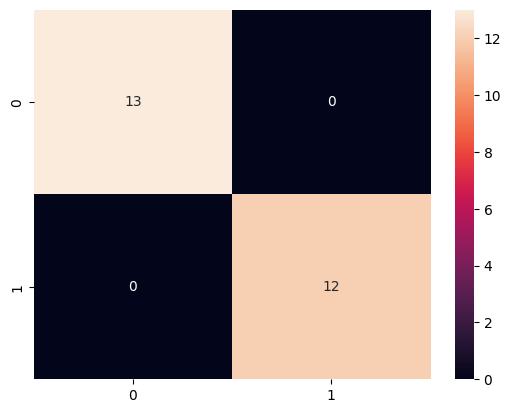

In [55]:
cm_new = confusion_matrix(y_new_test, y_new_hat_class)
sns.heatmap(cm_new, annot=True)
print("Accuracy is {a}".format(a=accuracy(y_new_test, y_new_hat_class)))

2-feature model vs 4-feature model?

1. Both of them performed really well, with 100% accuracy. This perfect score may be is because of the size of the test data is very small and the epoch count used (20).

2. One important thing to notice here is the results are different from what we saw in Linear Regression for the same data. There we have concluded that the 4-feature model is not good enough, whereas here both perform equally good.

3. Another thing to notice is that average loss for the model with 4 features is less than that with 2 features. More dimensions in the latent space is responsible for this.


In [90]:
# Comparing models by varying λ

rates = [0.05,0.5,1,1.5]
confusion_matrices = []
accuracies = []

for l_rate in rates:
    print("<------- For rate: {l} ------->".format(l=l_rate))
    X, y = dataset['data'], dataset['target']
    X, y = X[y < 2], y[y < 2]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                        stratify = y,
                                                        random_state = 123)

    w = Logistic_Regression(X_train, y_train, l_rate, 25)
    X_test_vec = generateVector(X_test)
    y_hat = sigmoid_function(X_test_vec.dot(w))
    y_hat_class = y_class(y_hat)

   
    confusion_matrices.append(confusion_matrix(y_test, y_hat_class))
    accuracies.append(accuracy(y_test, y_hat_class))

    print("<------ end ------>")


<------- For rate: 0.05 ------->
Epoch: 0 -> Loss: 8.662914268789793
Epoch: 1 -> Loss: 7.065929806543737
Epoch: 2 -> Loss: 5.469063580378198
Epoch: 3 -> Loss: 3.873459169860805
Epoch: 4 -> Loss: 2.2935100255200385
Epoch: 5 -> Loss: 0.9257046633363084
Epoch: 6 -> Loss: 0.77910086880138
Epoch: 7 -> Loss: 1.1305704496726294
Epoch: 8 -> Loss: 1.3766911960457737
Epoch: 9 -> Loss: 1.5378466500569947
Epoch: 10 -> Loss: 1.6386523695986874
Epoch: 11 -> Loss: 1.6982820997314467
Epoch: 12 -> Loss: 1.7305257216653827
Epoch: 13 -> Loss: 1.7448612761212356
Epoch: 14 -> Loss: 1.7476253210563943
Epoch: 15 -> Loss: 1.7429852409143856
Epoch: 16 -> Loss: 1.73365676915105
Epoch: 17 -> Loss: 1.7214014243165119
Epoch: 18 -> Loss: 1.7073595381544608
Epoch: 19 -> Loss: 1.692268891196493
Epoch: 20 -> Loss: 1.6766067458315712
Epoch: 21 -> Loss: 1.6606816564652378
Epoch: 22 -> Loss: 1.6446927241855518
Epoch: 23 -> Loss: 1.628767863892453
Epoch: 24 -> Loss: 1.612988566565842
<------ end ------>
<------- For rate:

/tmp/ipykernel_410/1199618856.py:22: RuntimeWarning: divide by zero encountered in log
  cost_value = - np.sum(np.dot(y.T,np.log(y_pred) + np.dot((1-y).T, np.log(1-y_pred)))) / (len(y_pred))
/tmp/ipykernel_410/1199618856.py:22: RuntimeWarning: divide by zero encountered in log
  cost_value = - np.sum(np.dot(y.T,np.log(y_pred) + np.dot((1-y).T, np.log(1-y_pred)))) / (len(y_pred))


Accuracy is 1.0


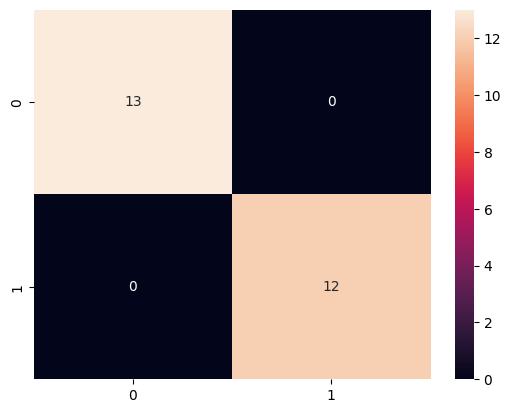

In [91]:
# λ = 0.05
sns.heatmap(confusion_matrices[0], annot=True)
print("Accuracy is {a}".format(a=accuracies[0]))


Accuracy is 1.0


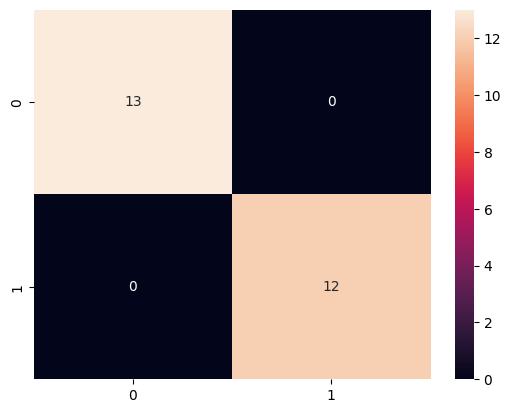

In [93]:
# λ = 0.5
sns.heatmap(confusion_matrices[1], annot=True)
print("Accuracy is {a}".format(a=accuracies[1]))


Accuracy is 1.0


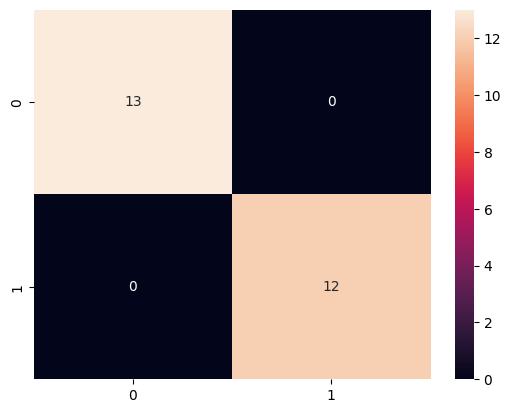

In [88]:
# λ = 1
sns.heatmap(confusion_matrices[2], annot=True)
print("Accuracy is {a}".format(a=accuracies[2]))


Accuracy is 1.0


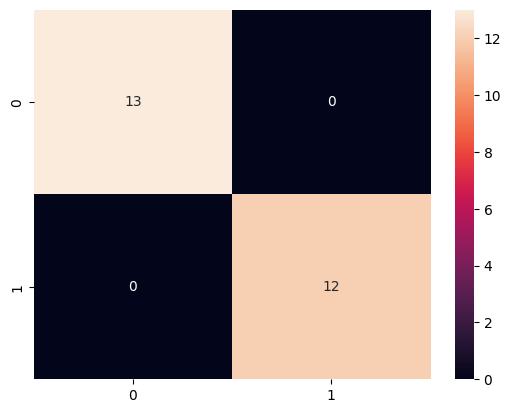

In [89]:
# λ = 1.5
sns.heatmap(confusion_matrices[3], annot=True)
print("Accuracy is {a}".format(a=accuracies[3]))


Effect of different learning rate?

1. The average loss reduced as we increased the learning rate from 0.05 to 1, and then it again rose up as the rate moved from 1 to 1.5.
2. Also, as I was playing with differnt values of epochs to train the model with these learning rates, I noticed accuracy score is different in each instance. So, I believe, setting the correct values for these hyper-parameters (epoch and learning_rate) is essential for better convergence and accuracy of the model.
